<h2 style="text-align: center;"><strong> Pipeline de Métricas para Visualizaciones Looker.S - FERIVA   </strong></h2>

<div style="height: 6px; display: flex; margin-bottom: 12px;">
  <div style="flex: 1; background-color: orange;"></div>
  <div style="flex: 1; background-color: violet;"></div>
  <div style="flex: 1; background-color: #006666;"></div>
</div>


## Carga de **Social Media Engagement Dataset** luego del ETL
<hr style="border: none; height: 5px; background-color: Orange;">



In [2]:
import pandas as pd

# Ruta absoluta al archivo en el Escritorio
ruta = r'C:\Users\Bruger\Desktop\Proyecto Redes\Dataset REDES\clean_social_media_dataset.csv'

# Carga del dataset
df = pd.read_csv(ruta)
df.head()


,post_id,timestamp,day_of_week,platform,user_id,language,text_content,hashtags,mentions,keywords,...,engagement_rate,brand_name,product_name,campaign_name,campaign_phase,user_past_sentiment_avg,user_engagement_growth,buzz_change_rate,city,country
0,kcqbs6hxybia,2024-12-09 11:26:15,Monday,Instagram,user_52nwb0a6,POR,Just tried the Chromebook from Google. Best pu...,#food,NaN,"price, unique, traditional, efficient",...,0.19319,Google,Chromebook,BlackFriday,Launch,0.0953,-0.3672,19.1,Melbourne,Australia
1,vkmervg4ioos,2024-07-28 19:59:26,Sunday,Twitter,user_ucryct98,RUS,Just saw an ad for Microsoft Surface Laptop du...,"#musthave, #food","@CustomerService, @BrandCEO","delivery, slow",...,0.05086,Microsoft,Surface Laptop,PowerRelease,Post-Launch,0.1369,-0.4510,-42.6,Tokyo,Japan
2,c9dkiomowakt,2024-09-05 21:03:01,Thursday,Twitter,user_l1vpox2k,HIN,Just tried the Corolla from Toyota. Absolutely...,"#health, #travel","@BrandSupport, @InfluencerName","innovation, budget, helpful, luxury",...,0.08773,Toyota,Corolla,LocalTouchpoints,Launch,0.6867,0.0807,38.8,Berlin,Germany
3,32qywmjy84gk,2024-08-21 17:02:47,Wednesday,Instagram,user_hpr07vl1,JPN,Not sure why with my new Pepsi Wild Cherry fro...,"#quality, #promo, #limited",NaN,"improved, unique, premium, durable",...,0.16139,Pepsi,Pepsi Wild Cherry,GlobalCampaign,Launch,-0.9263,-0.0810,-13.4,Madrid,Spain
4,wu063ci6mizp,2025-01-27 16:09:54,Monday,Reddit,user_2es9a4lv,ESP,Just saw an ad for Coca-Cola Coke Zero during ...,"#musthave, #discount","@MarketingTeam, @InfluencerName","efficient, innovation, performance",...,0.04442,Coca-Cola,Coke Zero,CustomerFirst,Post-Launch,-0.9831,0.2152,89.7,São Paulo,Brazil


## Creación de Métricas **Derivadas de Engagement**
<hr style="border: none; height: 5px; background-color: Orange;">

 Necesarias para descomponer la interacción total en componentes más específicos. Esto permite analizar qué tipo de interacción (likes, comentarios o compartidos) predomina en cada publicación.


In [3]:
# Volumen total de interacciones
df['interaction_volume'] = df['likes_count'] + df['shares_count'] + df['comments_count']

# Proporción de likes, comentarios y compartidos sobre impresiones
df['likes_ratio'] = df['likes_count'] / df['impressions']
df['comments_ratio'] = df['comments_count'] / df['impressions']
df['shares_ratio'] = df['shares_count'] / df['impressions']

# Verificar que las columnas se hayan creado correctamente
df[['interaction_volume', 'likes_ratio', 'comments_ratio', 'shares_ratio']].head()



,interaction_volume,likes_ratio,comments_ratio,shares_ratio
0,3669,0.066558,0.036912,0.089727
1,2684,0.009893,0.006804,0.034171
2,4151,0.042376,0.014858,0.030498
3,3961,0.114661,0.039687,0.007049
4,2550,0.009250,0.000523,0.034648


##  Creación de métricas **Temporales**
<hr style="border: none; height: 5px; background-color: Violet;">

Se generan columnas derivadas de la variable `timestamp` para analizar patrones temporales. Estas métricas permiten identificar comportamientos según la hora del día, el mes o si la publicación ocurrió en fin de semana.

In [4]:
# Asegurarse de que la columna timestamp esté en formato datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extraer hora del día
df['hour_of_day'] = df['timestamp'].dt.hour

# Extraer mes
df['month'] = df['timestamp'].dt.month

# Extraer año
df['year'] = df['timestamp'].dt.year

# Verificar si el día es fin de semana
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])

# Verificamos que las columnas se hayan creado correctamente
df[['timestamp', 'hour_of_day', 'month', 'year', 'is_weekend']].sample(5)



,timestamp,hour_of_day,month,year,is_weekend
1698,2024-05-21 07:09:46,7,5,2024,False
2517,2024-07-28 13:15:14,13,7,2024,True
8679,2024-08-12 03:39:55,3,8,2024,False
6885,2025-03-18 20:14:05,20,3,2025,False
2868,2025-01-10 03:25:59,3,1,2025,False


## Creación de métricas de **Contenido**
<hr style="border: none; height: 5px; background-color: Violet;">


##### Se generan métricas relacionadas con el contenido textual de las publicaciones. Estas variables permiten analizar la longitud del texto, la presencia de hashtags o menciones, y la cantidad de palabras clave asociadas a cada post.



In [5]:
# Longitud del texto de la publicación
df['text_length'] = df['text_content'].str.len()

# Presencia de hashtags
df['has_hashtags'] = df['hashtags'].apply(lambda x: bool(str(x).strip()))

# Presencia de menciones
df['has_mentions'] = df['mentions'].apply(lambda x: bool(str(x).strip()))

# Cantidad de palabras clave asociadas
df['num_keywords'] = df['keywords'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)

# Verificamos que las columnas se hayan creado correctamente
df[['text_length', 'has_hashtags', 'has_mentions', 'num_keywords']].sample(5)


,text_length,has_hashtags,has_mentions,num_keywords
9906,125,True,True,3
3034,131,True,True,2
889,97,True,True,2
4579,93,True,True,2
805,125,True,True,2


## Categorización de **Crecimiento y Buzz**
<hr style="border: none; height: 5px; background-color: Violet;">


##### Se clasifica el crecimiento del engagement en niveles (bajo, medio, alto) para facilitar el análisis comparativo. Esta categorización permite identificar publicaciones con alto impacto relativo y detectar patrones de viralidad o buzz.



In [6]:
# Clasificación del crecimiento de engagement en terciles
df['growth_level'] = pd.qcut(df['user_engagement_growth'], q=3, labels=['Bajo', 'Medio', 'Alto'])

# Verificamos la distribución de niveles de crecimiento
df['growth_level'].value_counts()


growth_level
Bajo     3503
Alto     3502
Medio    3501
Name: count, dtype: int64

## Revisión del dataset 
<hr style="border: none; height: 5px; background-color: #006666;">



In [7]:
# Vista general de las columnas y tipos de datos
df.info()

# Estadísticas descriptivas de las columnas numéricas
df.describe().T

# Verificamos si hay valores nulos
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   post_id                  10506 non-null  object        
 1   timestamp                10506 non-null  datetime64[ns]
 2   day_of_week              10506 non-null  object        
 3   platform                 10506 non-null  object        
 4   user_id                  10506 non-null  object        
 5   language                 10506 non-null  object        
 6   text_content             10506 non-null  object        
 7   hashtags                 10506 non-null  object        
 8   mentions                 7054 non-null   object        
 9   keywords                 10506 non-null  object        
 10  topic_category           10506 non-null  object        
 11  sentiment_score          10506 non-null  float64       
 12  sentiment_label          10506 n

post_id                       0
timestamp                     0
day_of_week                   0
platform                      0
user_id                       0
language                      0
text_content                  0
hashtags                      0
mentions                   3452
keywords                      0
topic_category                0
sentiment_score               0
sentiment_label               0
emotion_type                  0
toxicity_score                0
likes_count                   0
shares_count                  0
comments_count                0
impressions                   0
engagement_rate               0
brand_name                    0
product_name                  0
campaign_name                 0
campaign_phase                0
user_past_sentiment_avg       0
user_engagement_growth        0
buzz_change_rate              0
city                          0
country                     304
interaction_volume            0
likes_ratio                   0
comments

## **Visualizaciones** 
<hr style="border: none; height: 5px; background-color: #006666;">


##### Se generan gráficos para explorar visualmente las métricas creadas. Estas visualizaciones permiten detectar patrones, comparar plataformas y evaluar el impacto de distintas variables sobre el engagement.



#### **Gráfico 1** | Distribución del engagement rate
La mayoría de las publicaciones tienen un engagement rate bajo, con una concentración entre 0.03 y 0.08. Esto indica que solo una minoría logra niveles de interacción altos, mostrando una distribución sesgada a la derecha.



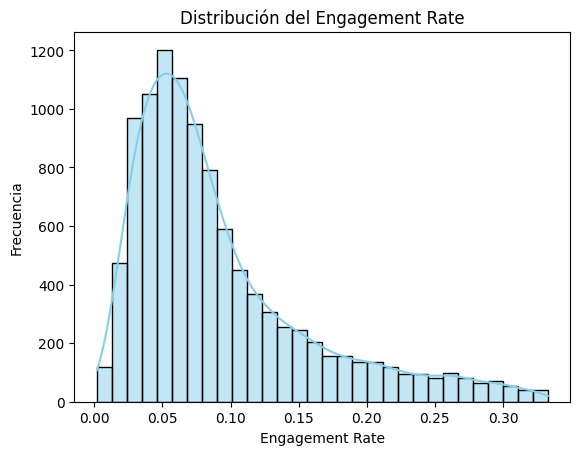

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['engagement_rate'], bins=30, kde=True, color='skyblue')
plt.title('Distribución del Engagement Rate')
plt.xlabel('Engagement Rate')
plt.ylabel('Frecuencia')
plt.show()



### **Gráfico 2** | Comparación de ratios por plataforma
Likes son la forma dominante de interacción en todas las plataformas. 

Instagram, Reddit y Facebook tienen un patrón muy similar, 
mientras que YouTube muestra ratios levemente más bajos. Los comentarios y compartidos tienen menor peso relativo.




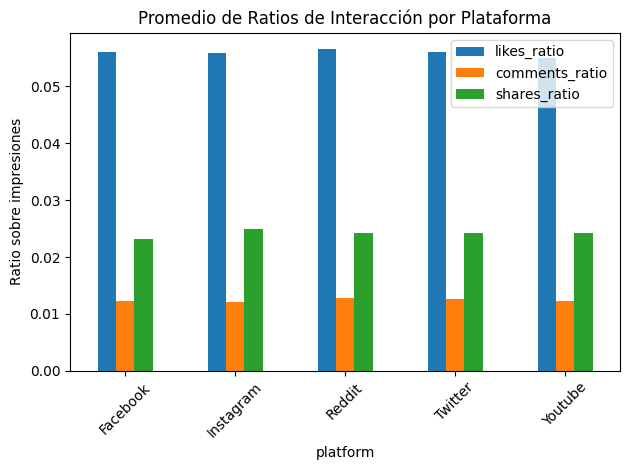

In [9]:
df.groupby('platform')[['likes_ratio', 'comments_ratio', 'shares_ratio']].mean().plot(kind='bar')
plt.title('Promedio de Ratios de Interacción por Plataforma')
plt.ylabel('Ratio sobre impresiones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **Gráfico 3** | Engagement por hora del día

Se detectan picos de engagement entre las 11 hs y las 15 hs, y nuevamente entre las 20 hs y 22 hs. 

Estos horarios podrían representar ventanas óptimas para publicar contenido y maximizar la interacción.

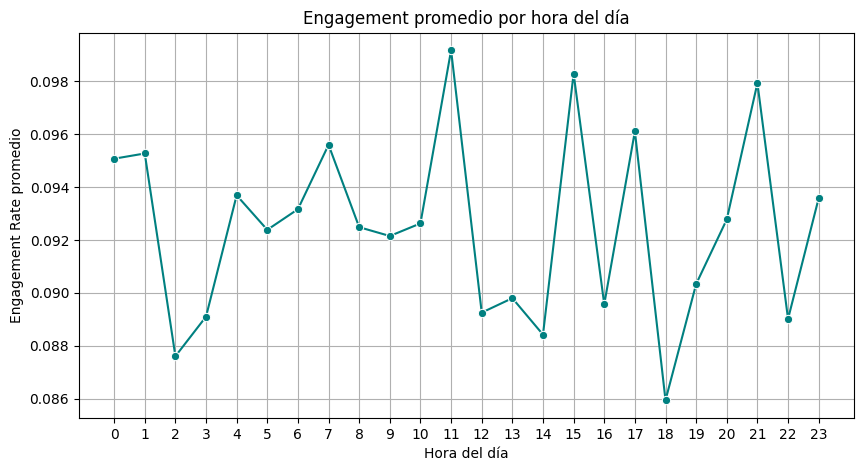

In [10]:
# Calcular el promedio de engagement por hora
engagement_por_hora = df.groupby('hour_of_day')['engagement_rate'].mean().reset_index()

# Gráfico de línea
plt.figure(figsize=(10, 5))
sns.lineplot(data=engagement_por_hora, x='hour_of_day', y='engagement_rate', marker='o', color='teal')
plt.title('Engagement promedio por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Engagement Rate promedio')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()



## Exportación **Final**
<hr style="border: none; height: 5px; background-color: Black;">

In [11]:
# Exportar el dataset enriquecido a un archivo CSV
df.to_csv('final_social_media_dataset.csv', index=False)

print("✅ Dataset exportado como 'final_social_media_dataset.csv'")


✅ Dataset exportado como 'final_social_media_dataset.csv'
